In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
k1 = 1
k2 = 1

In [24]:
A = np.array([[1, 0, 1], [0, 1, -1], [-1, 1, 0]])
b = np.array([2, 1, 1])
x = np.linalg.solve(A, b)

A0 = x[0]
B0 = x[1]
C0 = x[2]

In [25]:
T = 10
dt = 0.1
t = np.linspace(0, T, int(T/dt) + 1)

In [26]:
def dAdt(A, B, C):
    return -k1*A*B + k2*C

def dBdt(A, B, C):
    return -k1*A*B + k2*C

def dCdt(A, B, C):
    return k1*A*B - k2*C

In [27]:
# Estimate by Runge-Kutta Method
A_rk = np.zeros(len(t))
A_rk[0] = A0

B_rk = np.zeros(len(t))
B_rk[0] = B0

C_rk = np.zeros(len(t))
C_rk[0] = C0

for it in range(1, len(t)):    
    xk1 = dAdt(A_rk[it-1], B_rk[it-1], C_rk[it-1])
    yk1 = dBdt(A_rk[it-1], B_rk[it-1], C_rk[it-1])
    zk1 = dCdt(A_rk[it-1], B_rk[it-1], C_rk[it-1])
    xk2 = dAdt(A_rk[it-1] + xk1 * dt/2, B_rk[it-1] + yk1 * dt/2, C_rk[it-1] + zk1 * dt/2)
    yk2 = dBdt(A_rk[it-1] + xk1 * dt/2, B_rk[it-1] + yk1 * dt/2, C_rk[it-1] + zk1 * dt/2)
    zk2 = dCdt(A_rk[it-1] + xk1 * dt/2, B_rk[it-1] + yk1 * dt/2, C_rk[it-1] + zk1 * dt/2)
    xk3 = dAdt(A_rk[it-1] + xk2 * dt/2, B_rk[it-1] + yk2 * dt/2, C_rk[it-1] + zk2 * dt/2)
    yk3 = dBdt(A_rk[it-1] + xk2 * dt/2, B_rk[it-1] + yk2 * dt/2, C_rk[it-1] + zk2 * dt/2)
    zk3 = dCdt(A_rk[it-1] + xk2 * dt/2, B_rk[it-1] + yk2 * dt/2, C_rk[it-1] + zk2 * dt/2)
    xk4 = dAdt(A_rk[it-1] + xk3 * dt, B_rk[it-1] + yk3 * dt, C_rk[it-1] + zk3 * dt)
    yk4 = dBdt(A_rk[it-1] + xk3 * dt, B_rk[it-1] + yk3 * dt, C_rk[it-1] + zk3 * dt)
    zk4 = dCdt(A_rk[it-1] + xk3 * dt, B_rk[it-1] + yk3 * dt, C_rk[it-1] + zk3 * dt)

    A_rk[it] = A_rk[it-1] + (1/6) * dt * (xk1 + 2*xk2 + 2*xk3 + xk4)
    B_rk[it] = B_rk[it-1] + (1/6) * dt * (yk1 + 2*yk2 + 2*yk3 + yk4)
    C_rk[it] = C_rk[it-1] + (1/6) * dt * (zk1 + 2*zk2 + 2*zk3 + zk4)

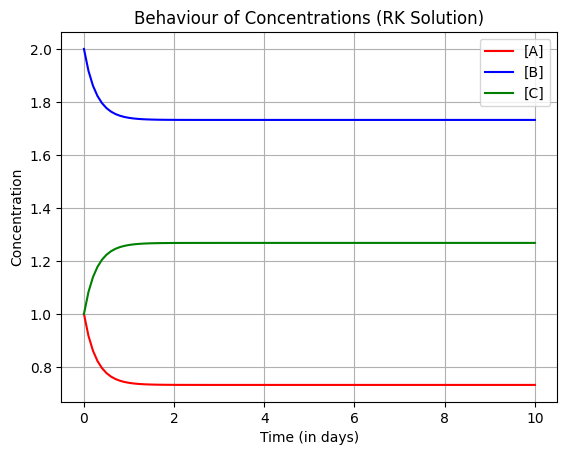

In [28]:
plt.plot(t, A_rk, label='[A]', color='red')
plt.plot(t, B_rk, label='[B]', color='blue')
plt.plot(t, C_rk, label='[C]', color='green')
plt.xlabel('Time (in days)')
plt.ylabel('Concentration')
plt.title('Behaviour of Concentrations (RK Solution)')
plt.legend()
plt.grid()

plt.show()